In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [6]:
! ls data/figures/

lynyi


In [7]:
df = gpd.read_file('data/points_for_map.geojson')
nombres= df.nombre.unique()

In [8]:
nombres

array(['Zona Yoltic, Conquista Alpheratz, Los Girasoles',
       "Zona Xiimbal K'a, Escuadrón Black Hawk, Jardín Ramón López Velarde",
       'Zona Sadday, Cadena Izneik, La Bombilla',
       "Zona Ki'ich Kelem Ajal, Cadena Grasmere, Explanada BJ",
       "Zona Xiimbal K'a, Conquista Aldebarán, La Moderna",
       'Zona Hyadi, Escuadrón Mauna Kea, Tlacoquemécatl (Jardín del Arte)',
       'Zona Ollin Anxelli, Conquista Algenib, Juana de Asbaje',
       'Zona Hyadi, Conquista Deneb, Las Américas',
       "Zona Xiimbal K'a, Cadena Hazlet, Acacias",
       'Zona Ollin Anxelli, Escuadrón Kyle Rock, Parque Kyle Rock',
       'Zona Kayná, Cadena Althea, Depósito de pilas',
       "Zona Xiimbal K'a, Escuadrón Mauna Loa, Alfonso Esparza Oteo",
       'Zona Hyadi, Escuadrón Ilampú, Parque Arboledas',
       'Zona Sadday, Escuadrón Laskar, Las Islas',
       "Zona Ki'ich Kelem Ajal, Escuadrón Brandaris, Las Islas",
       "Zona Ki'ich Kelem Ajal, Cadena Mashai, Cerro de Jesús 197",
       'Zona 

/home/pepe/miniconda3/envs/desarollo_plataforma/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


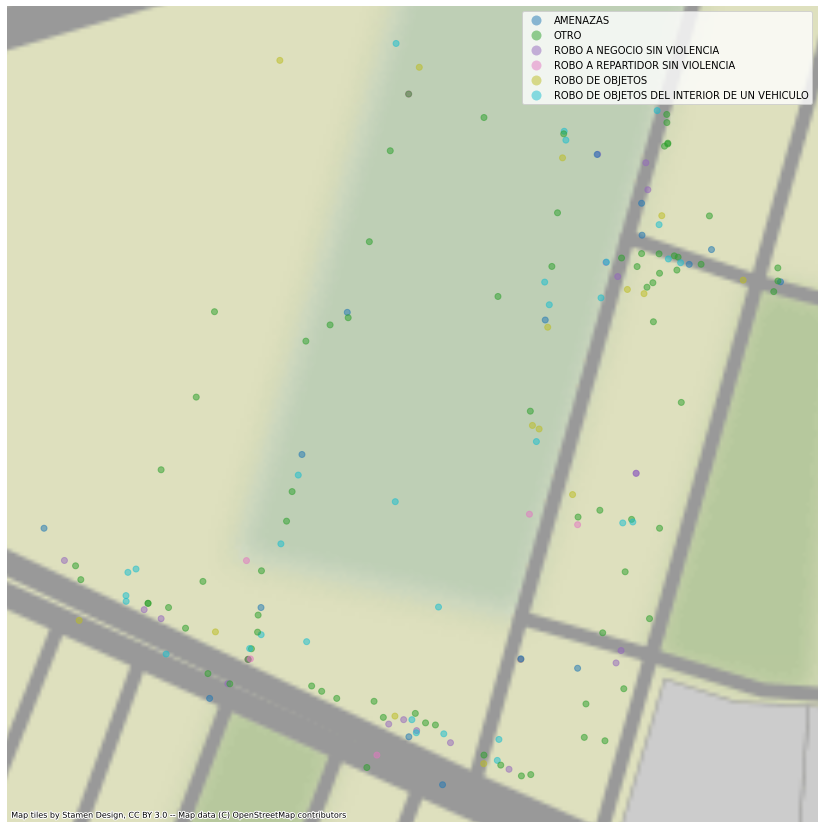

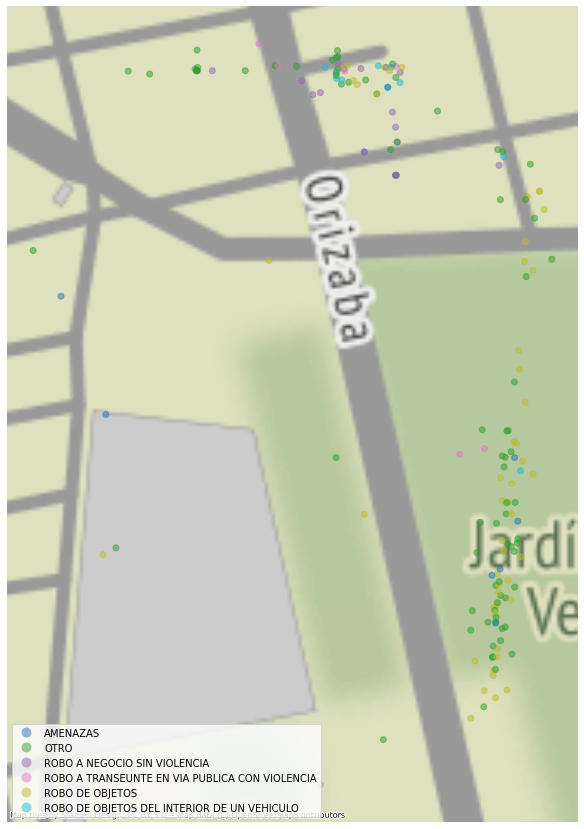

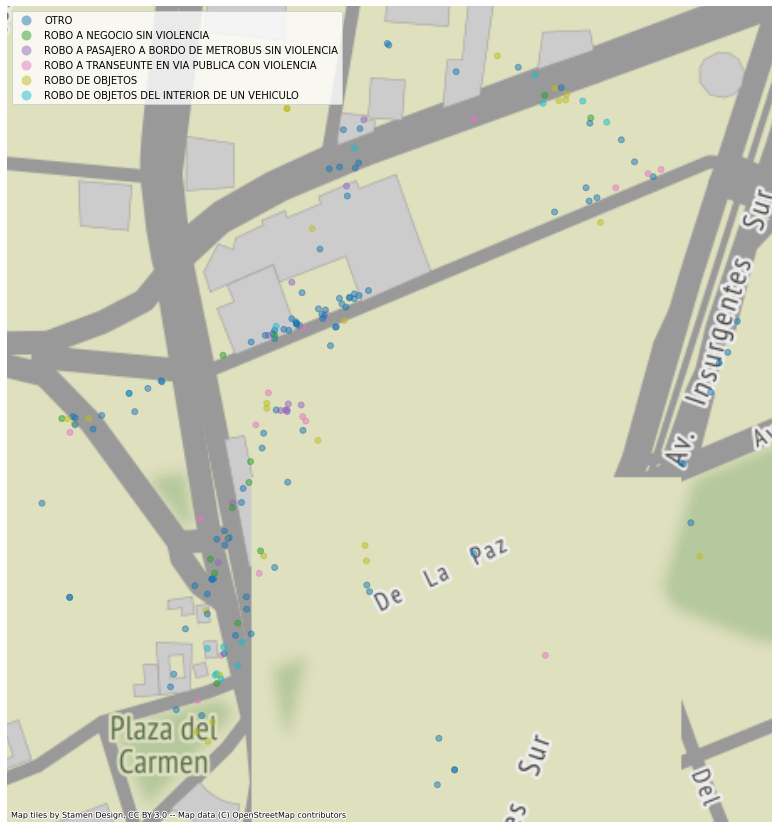

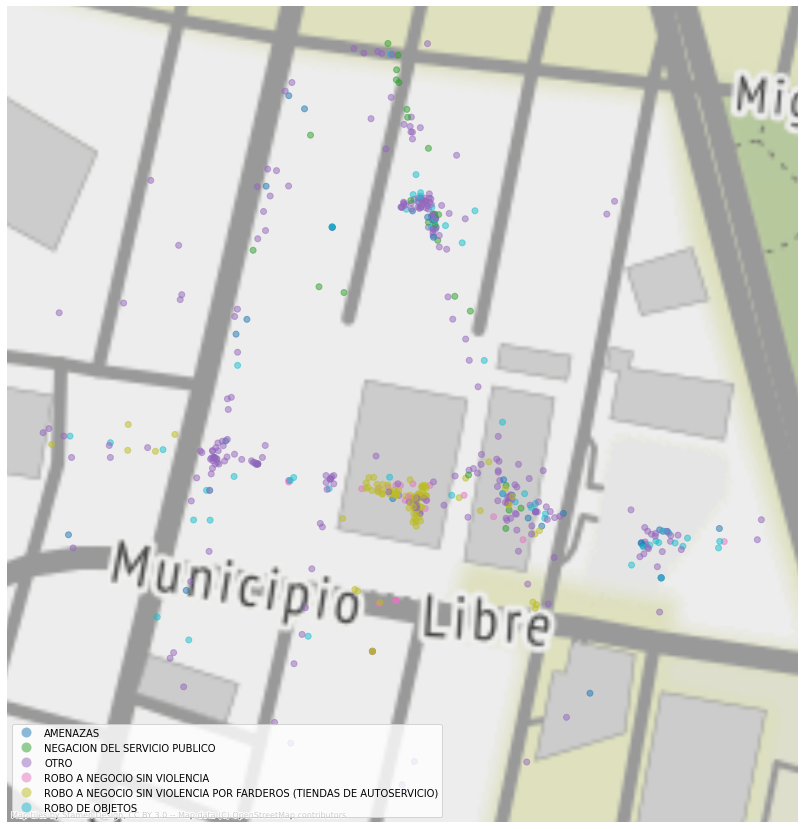

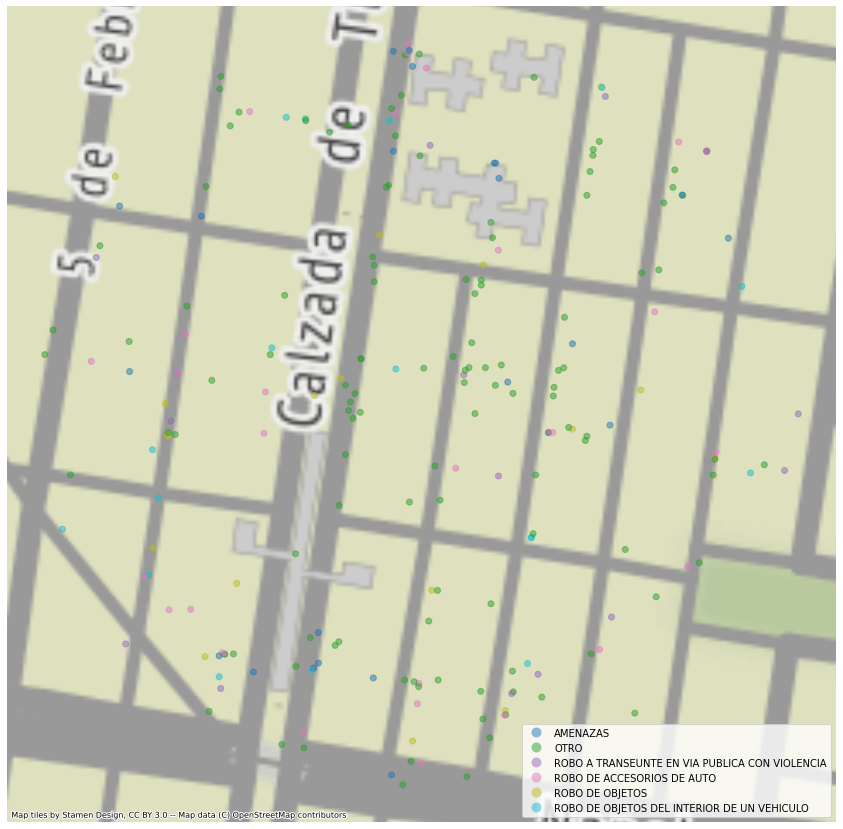

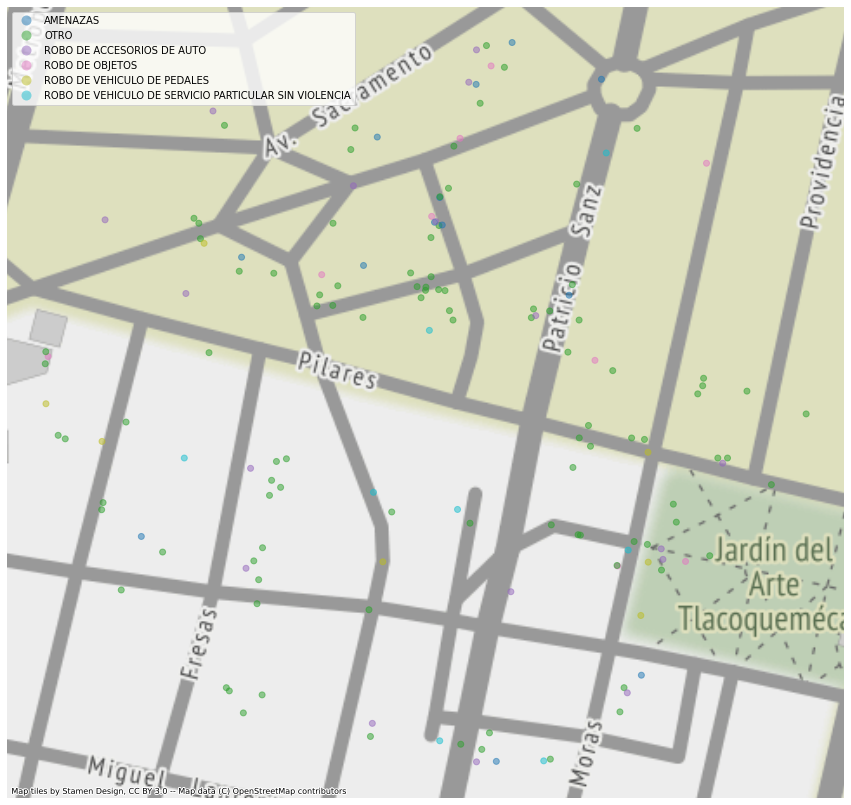

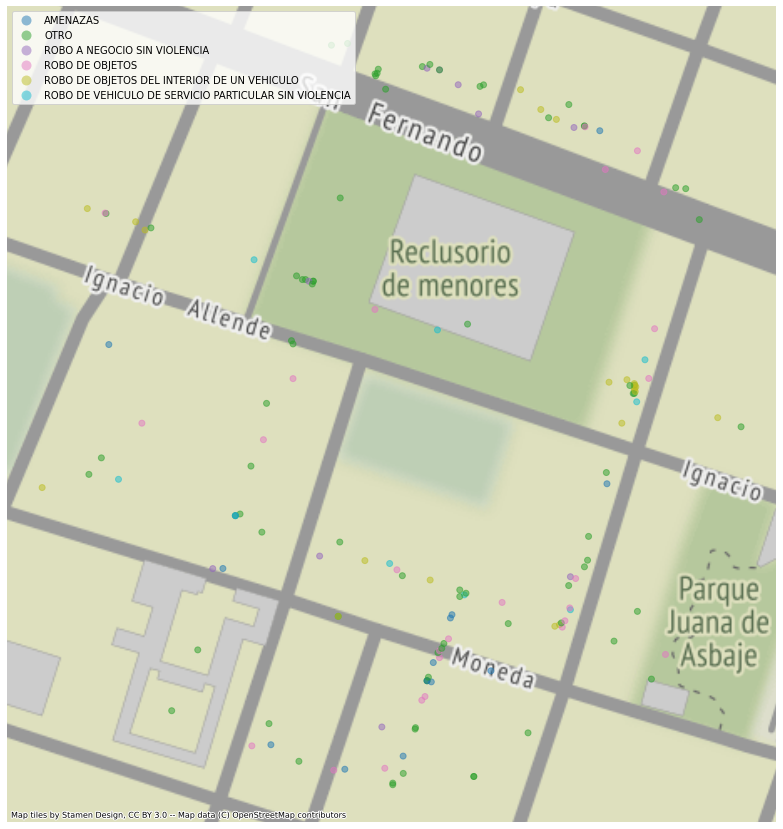

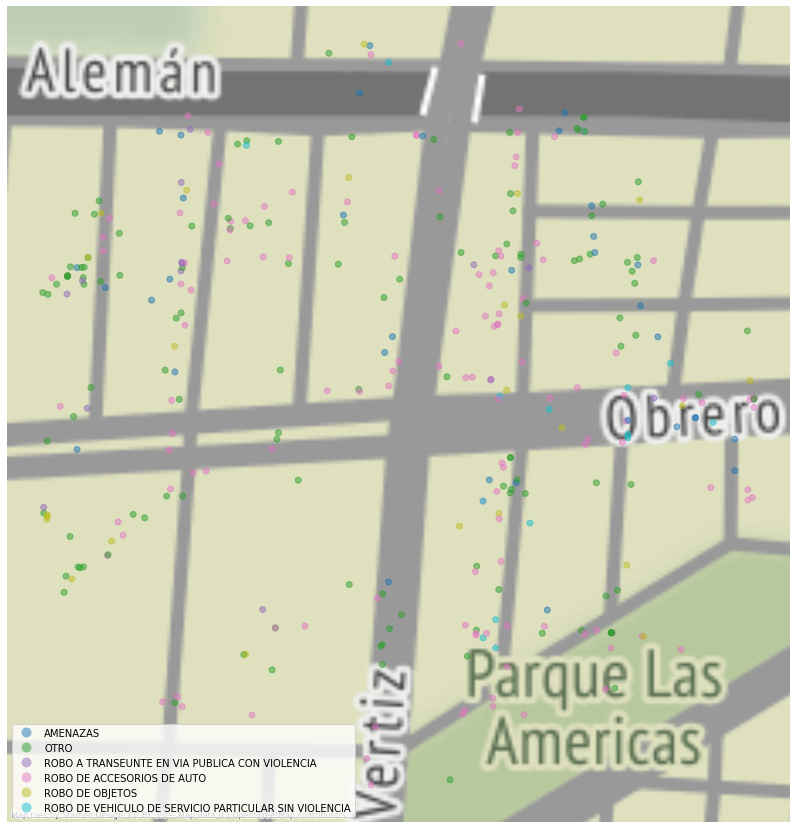

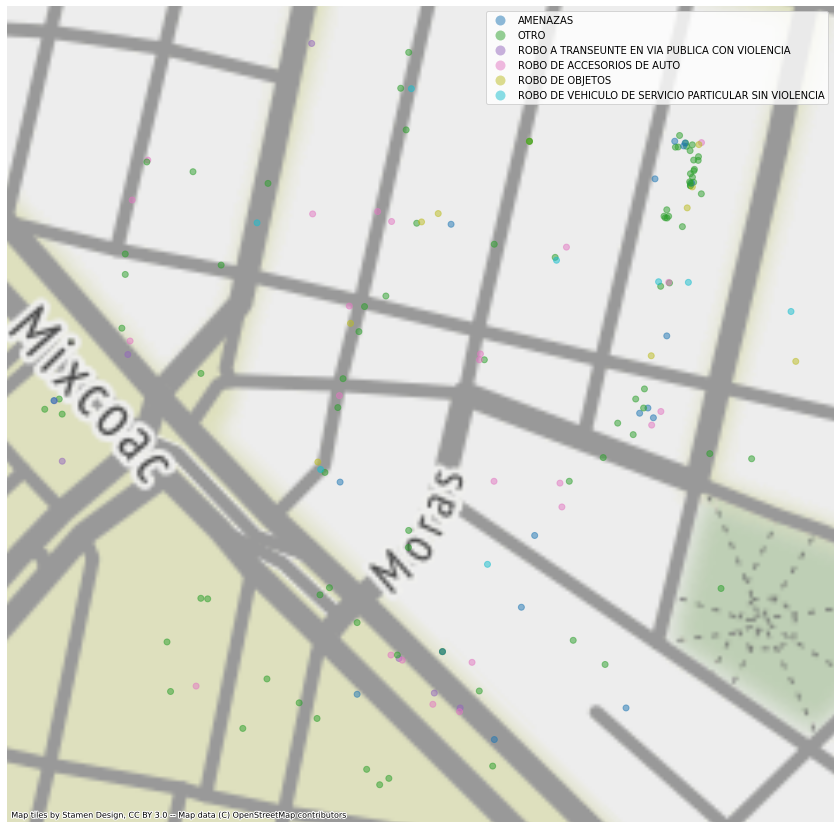

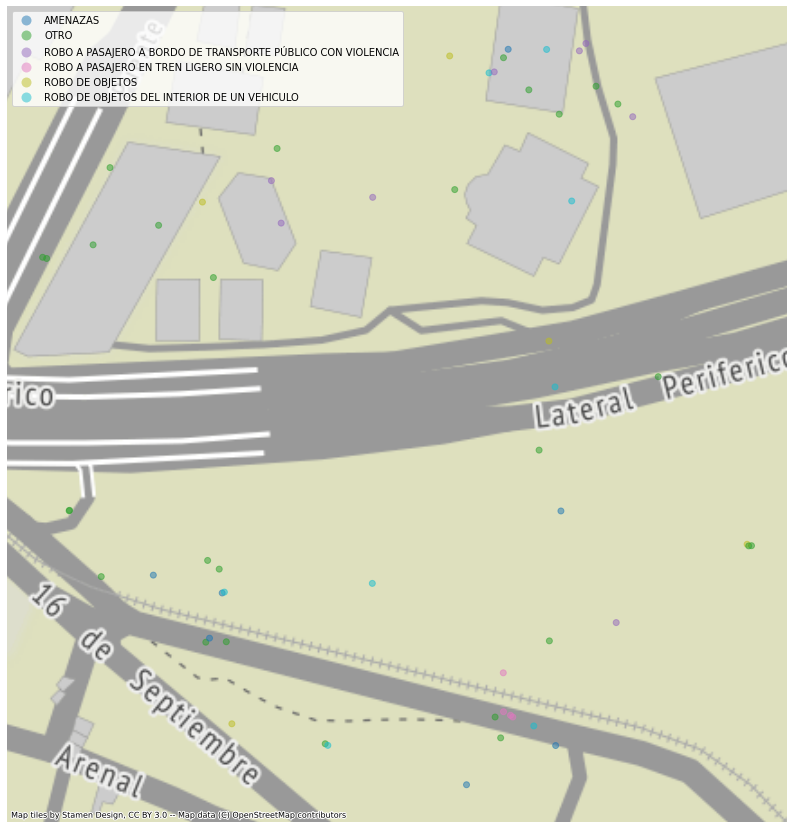

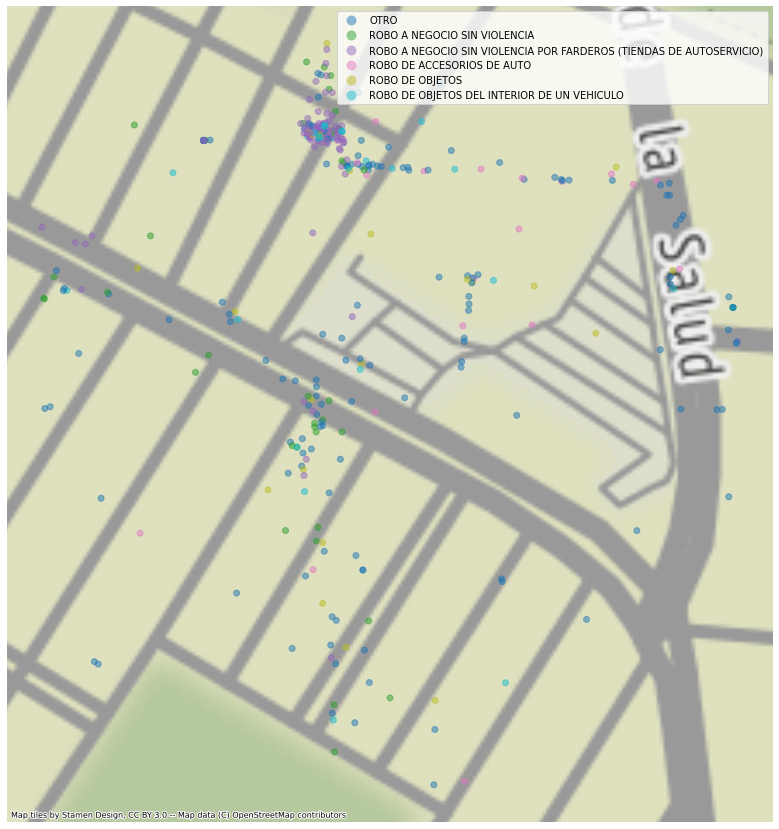

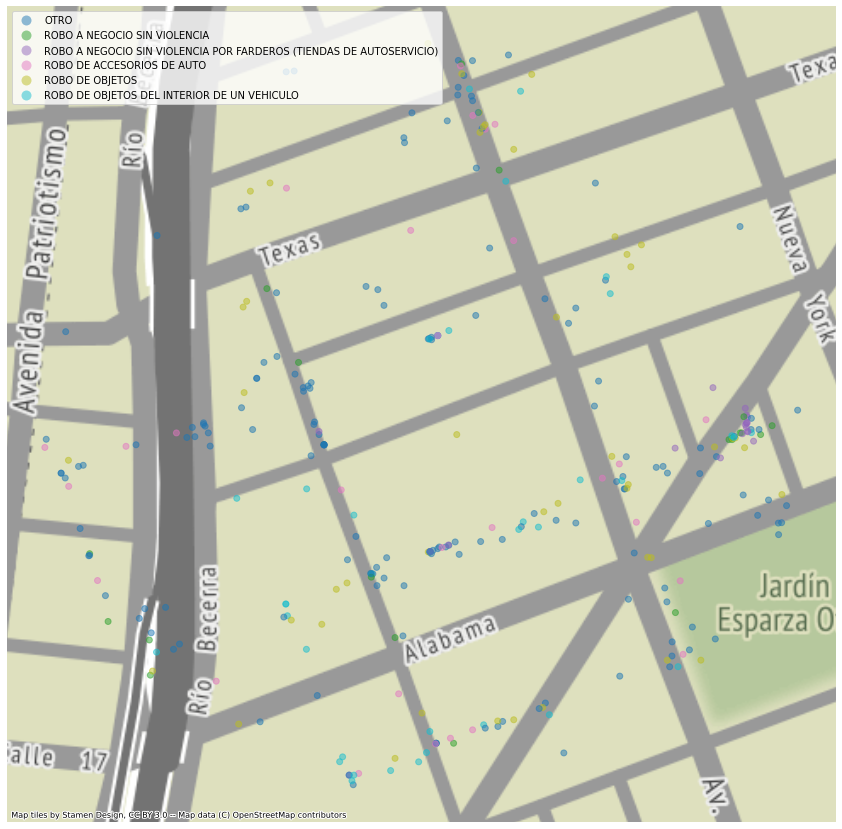

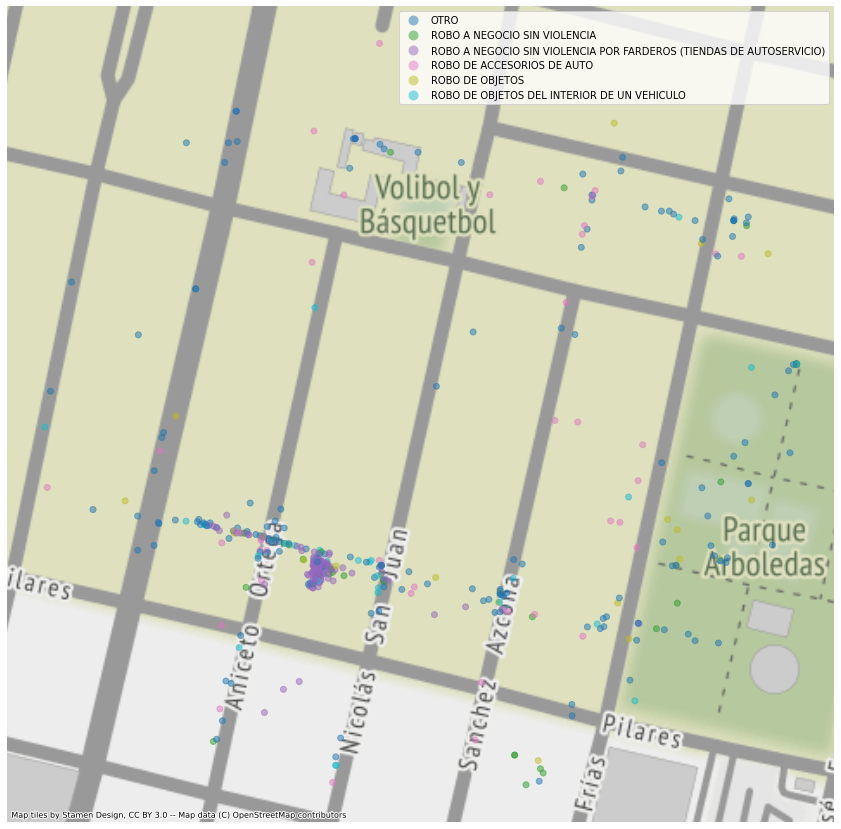

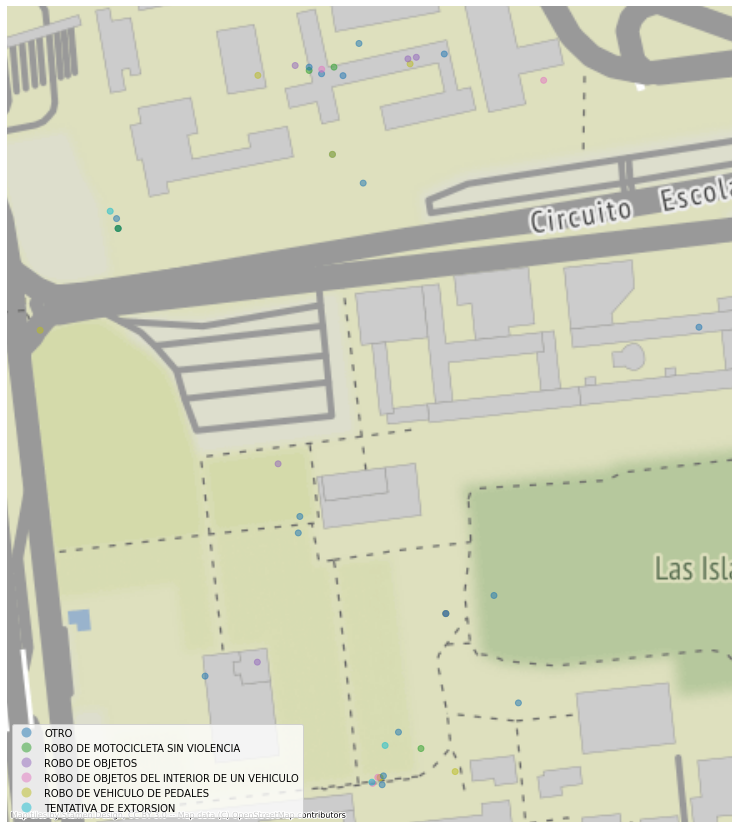

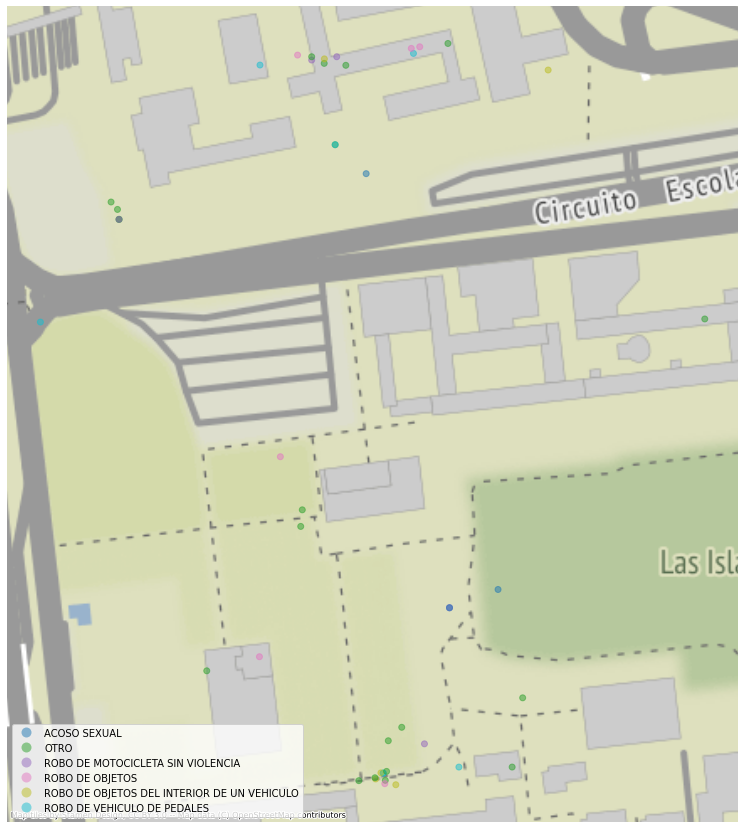

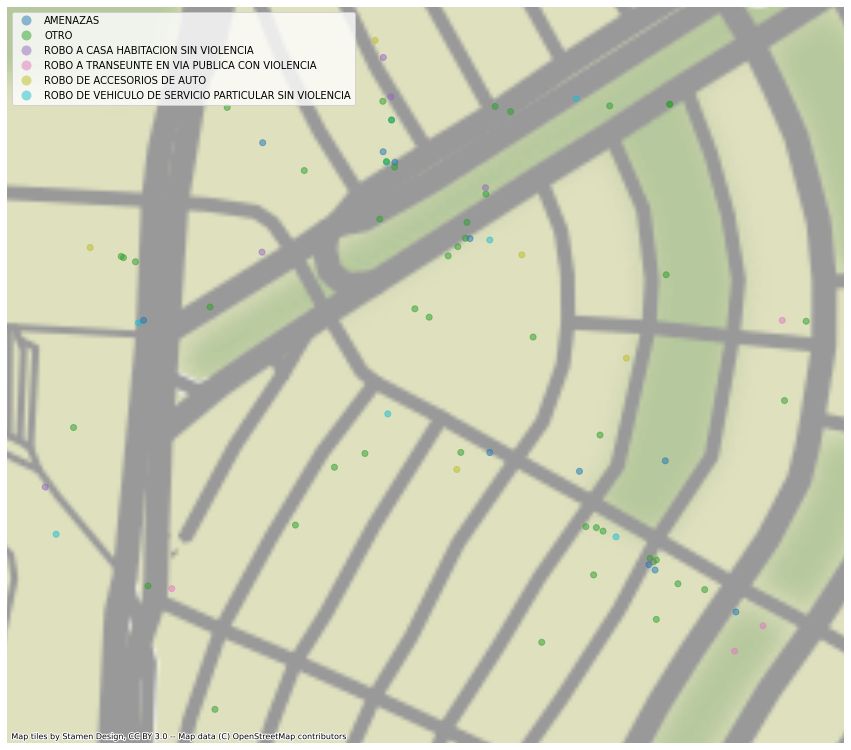

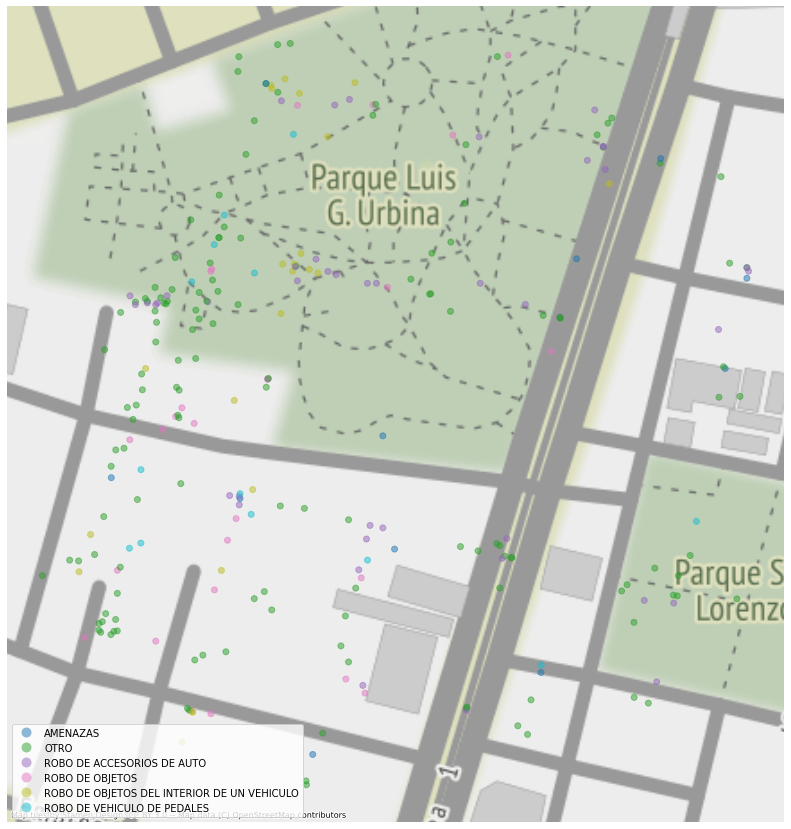

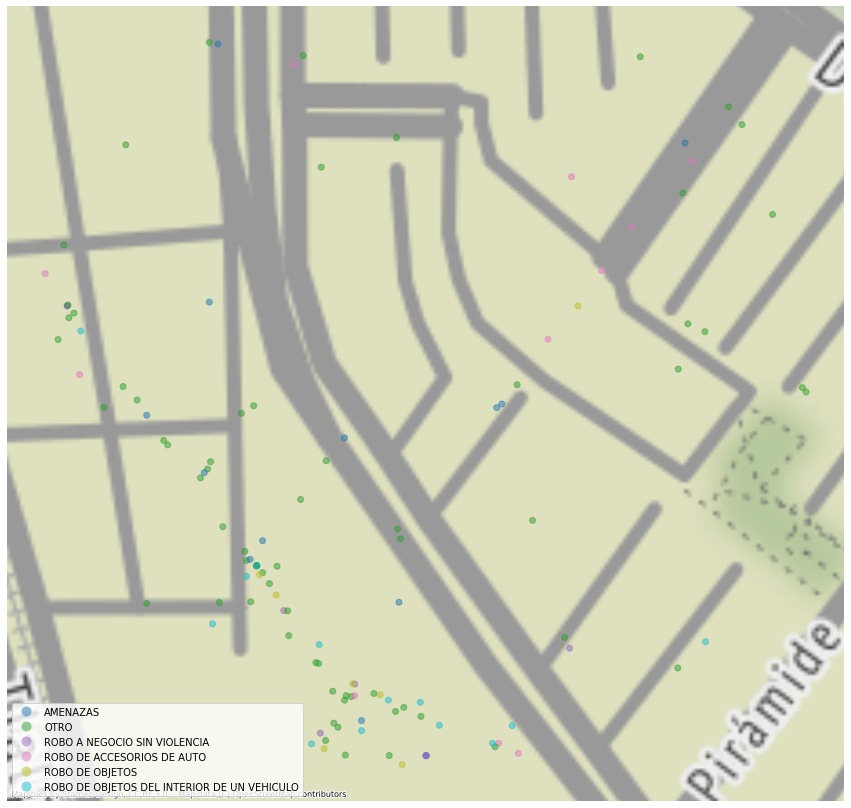

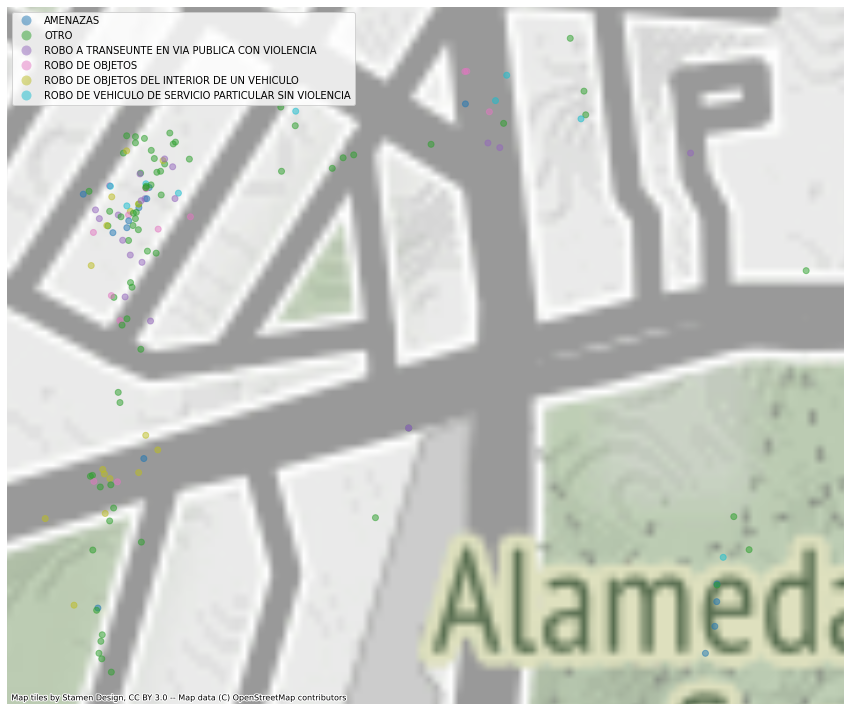

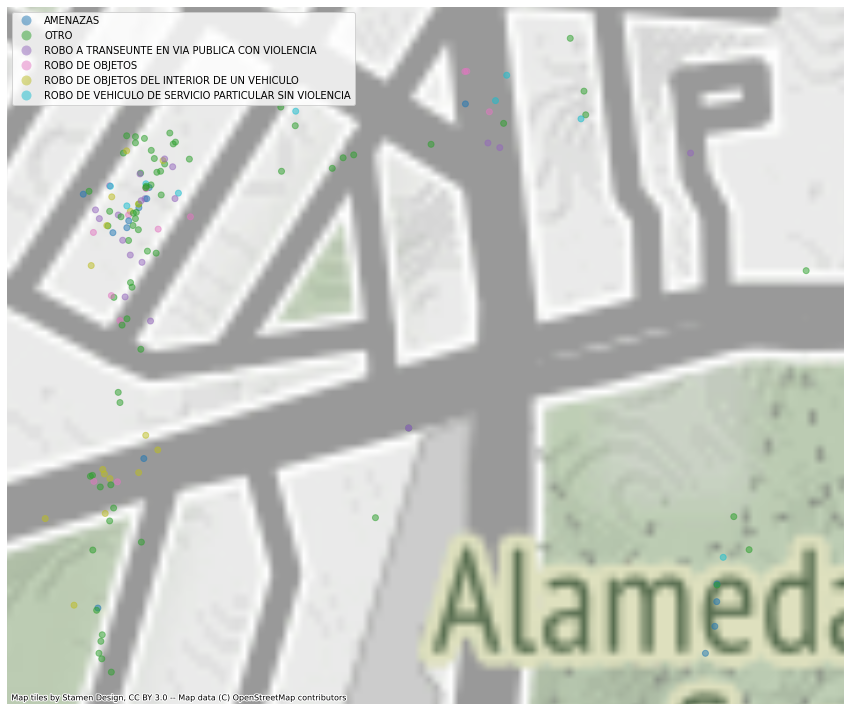

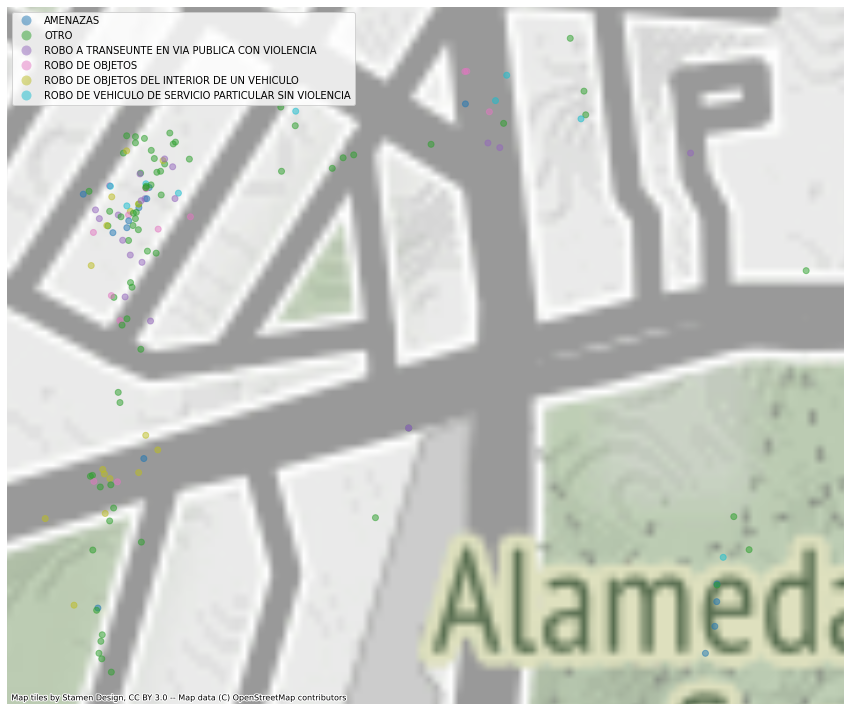

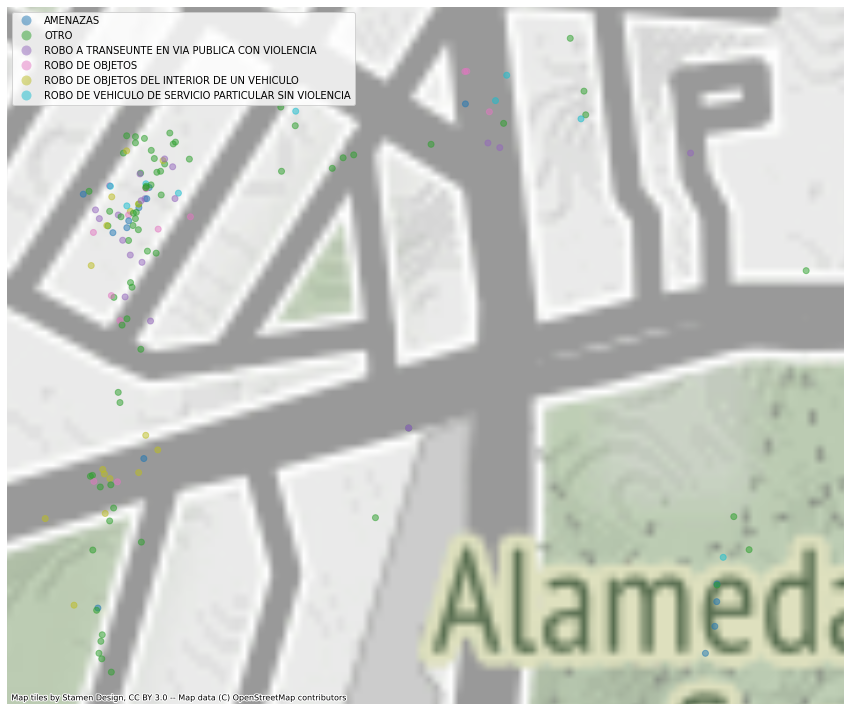

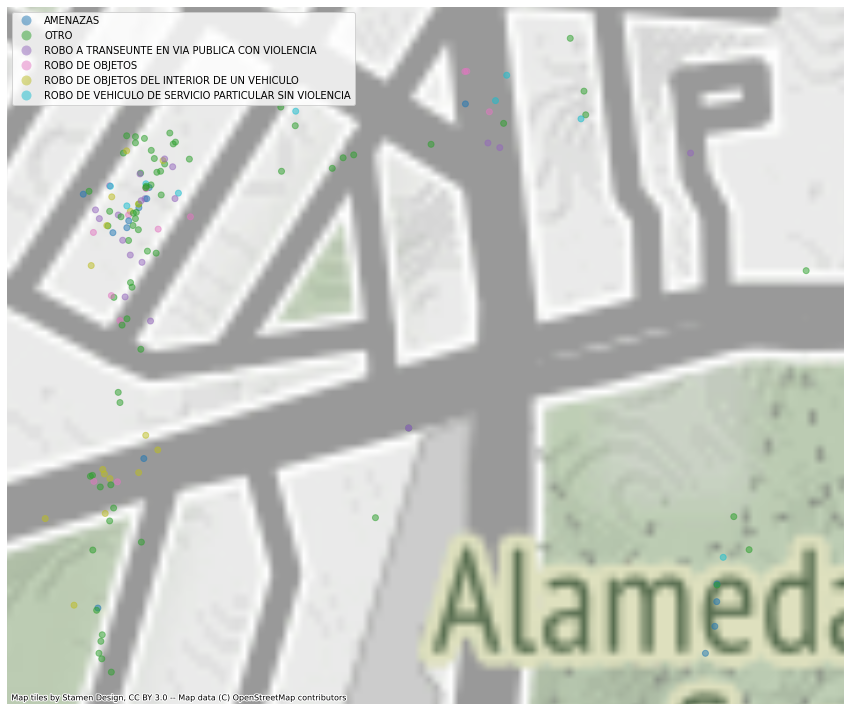

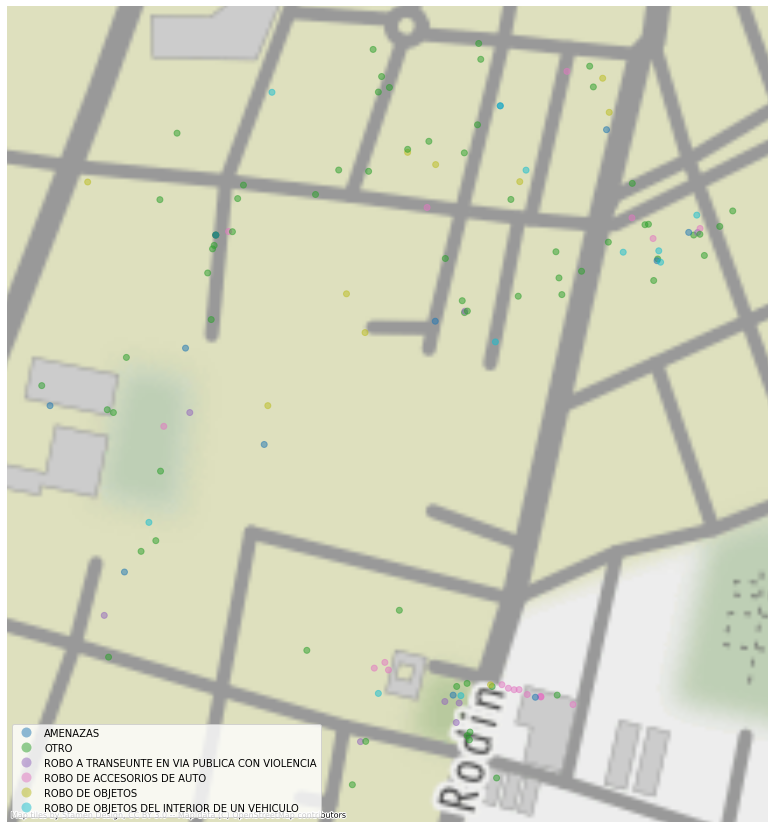

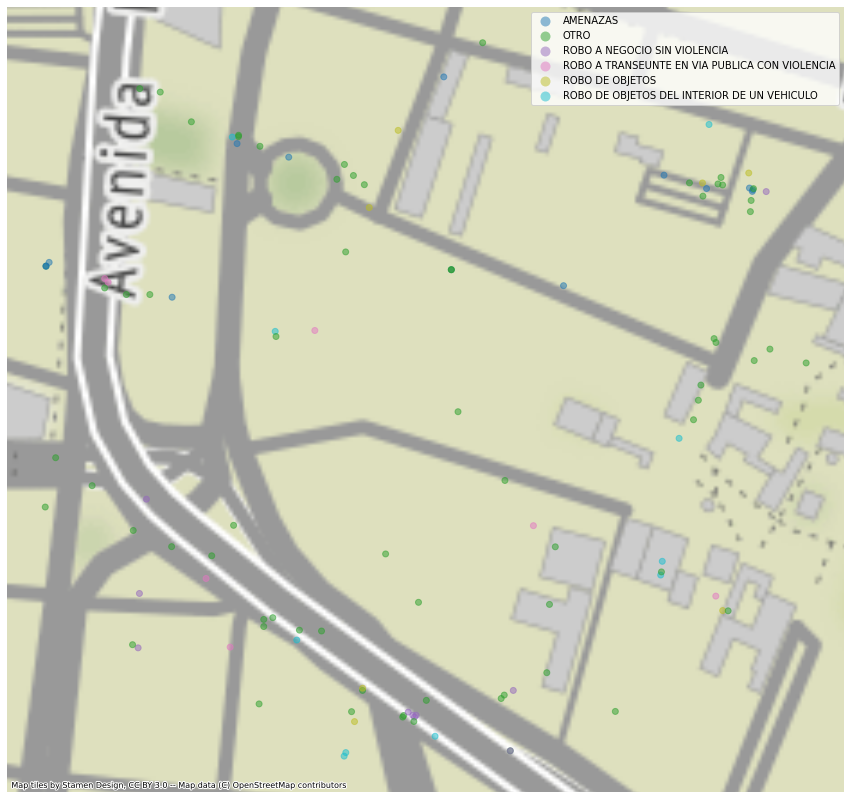

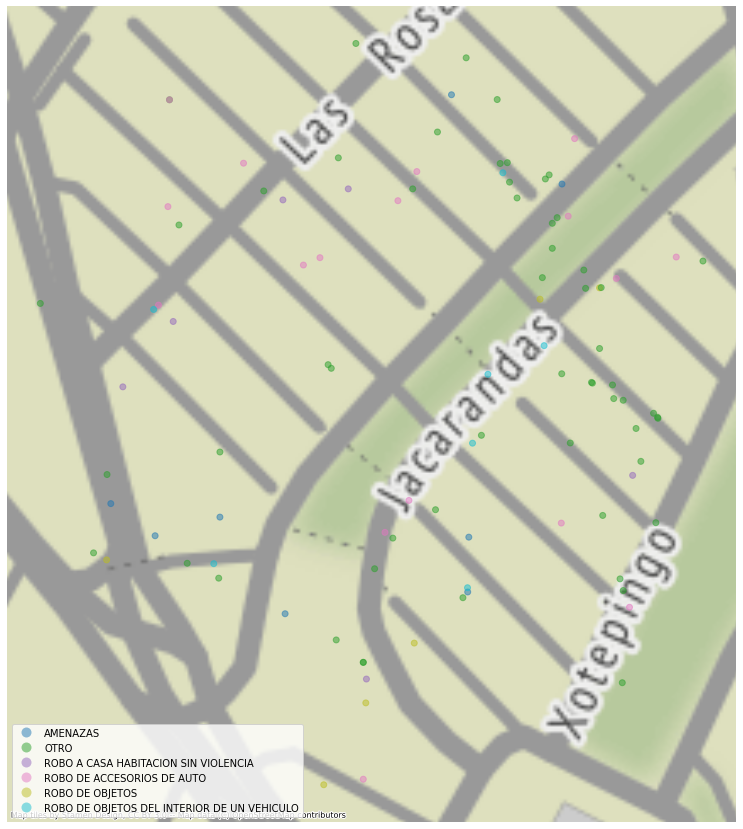

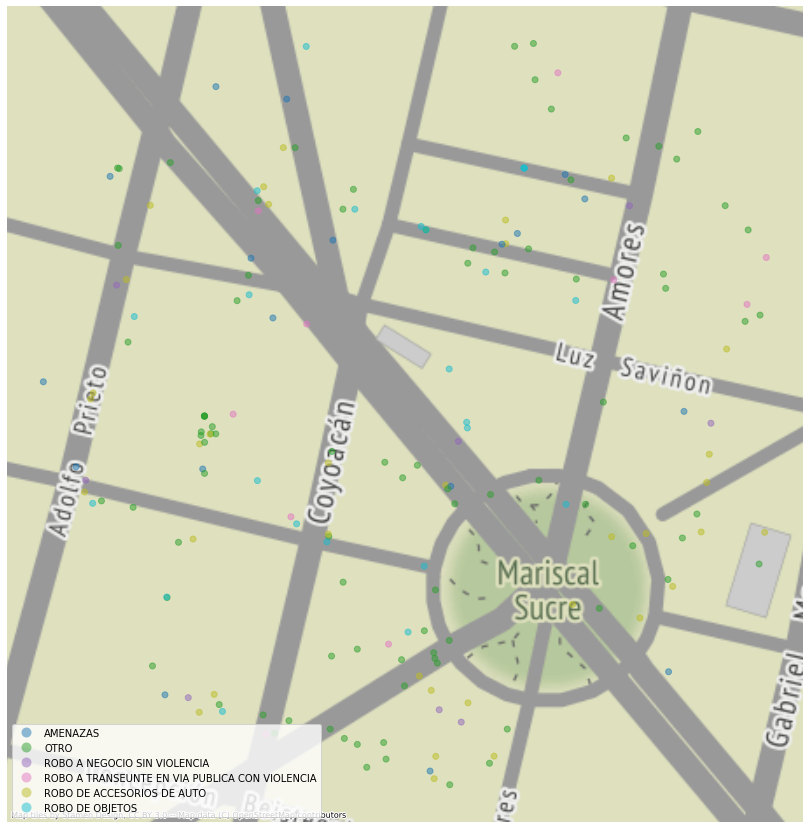

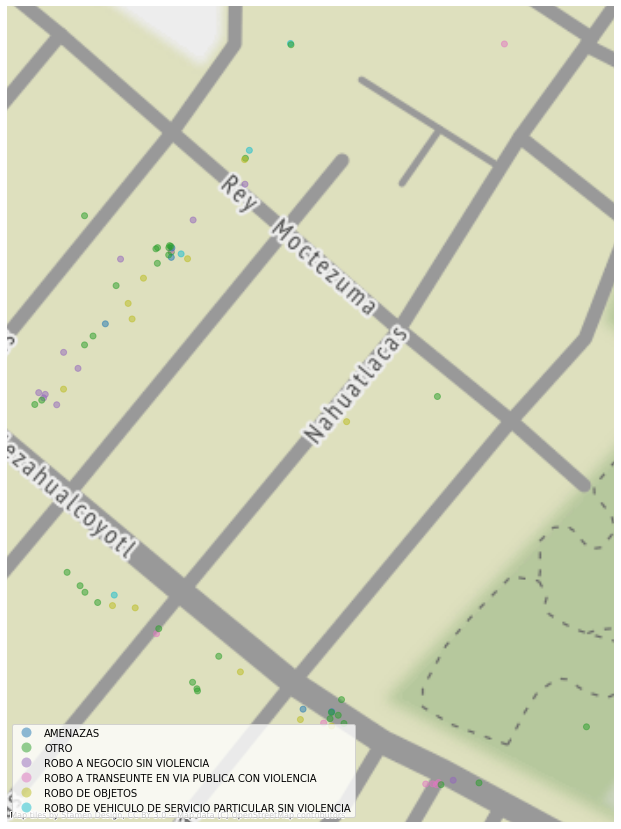

In [9]:
for place in nombres:
    df_place= df.query(f'nombre == "{place}"')
    df_place.crs = 'epsg:4623'
    df_place = df_place.to_crs(epsg=3857)
    top_delitos = df_place.delito.value_counts().head(5).index
    mapa_top =dict([(d, d) for d in top_delitos])
    df_place= df_place.assign(delito = lambda x:x.delito.map(mapa_top).fillna('OTRO'))
    ax = df_place.plot('delito', figsize=(15, 15), alpha=0.5, legend= True)
    try:
        cx.add_basemap(ax, zoom=17)
    except:
        try: 
            cx.add_basemap(ax, zoom=16)
        except:
            #print('fail')
            try:
                cx.add_basemap(ax, zoom=15)
            except:
                try:
                    cx.add_basemap(ax, zoom=14)
                except:
                    pass
    #            
    plt.axis('off')
    plt.savefig(f'data/figures/{place}/map.png')